### Titanic - Machine Learning from Disaster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import ensemble
from sklearn import svm
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the full training and test data
train_df = pd.read_csv("train.csv", index_col='PassengerId')
test_df = pd.read_csv("test.csv", index_col='PassengerId')

y = train_df["Survived"]

### Distribution of Labels

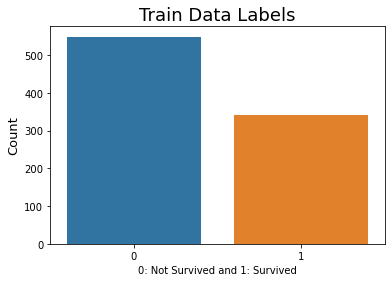

In [3]:
b = sns.countplot(x='Survived', data=train_df)
b.set_title('Train Data Labels', fontsize=18)
b.set_ylabel("Count", fontsize=13)
b.set_xlabel("0: Not Survived and 1: Survived");

In [4]:
train_df = train_df.drop(['Survived'], axis=1)

all_df = pd.concat([train_df, test_df])
all_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### Feature Engineering

In [5]:
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


In [7]:
# too many missing values
all_df.drop(columns='Cabin', inplace=True)

In [8]:
print("mean:", all_df["Age"].mean())
print("median:", all_df["Age"].median())
all_df["Age"] = all_df["Age"].fillna(all_df["Age"].mean())
all_df["Fare"] = all_df["Fare"].fillna(all_df["Fare"].median())

mean: 29.881137667304014
median: 28.0


In [9]:
all_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

In [10]:
# splitting Name column 

# all_df["Title"] = (all_df.Name.str.split(pat=',', n=2, expand=True)[1]).str.split(pat='.', n=2, expand=True)[0]
# all_df["Name"] = all_df.Name.str.split(pat=',', n=2, expand=True)[0]

# all_df

In [11]:
# making a feature list
features = [
    f for f in all_df.columns if f not in ('PassengerId', 'Survived', 'Ticket', 'Name')
]

features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [12]:
all_df[features]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.000000,1,0,7.2500,S
2,1,female,38.000000,1,0,71.2833,C
3,3,female,26.000000,0,0,7.9250,S
4,1,female,35.000000,1,0,53.1000,S
5,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
1305,3,male,29.881138,0,0,8.0500,S
1306,1,female,39.000000,0,0,108.9000,C
1307,3,male,38.500000,0,0,7.2500,S


### One-hot Encoding

In [13]:
all_df = pd.get_dummies(all_df[features])
all_df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.000000,1,0,7.2500,0,1,0,0,1
2,1,38.000000,1,0,71.2833,1,0,1,0,0
3,3,26.000000,0,0,7.9250,1,0,0,0,1
4,1,35.000000,1,0,53.1000,1,0,0,0,1
5,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1305,3,29.881138,0,0,8.0500,0,1,0,0,1
1306,1,39.000000,0,0,108.9000,1,0,1,0,0
1307,3,38.500000,0,0,7.2500,0,1,0,0,1


In [14]:
features = all_df.columns.to_list()
features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [15]:
train_df = all_df[0:891]

x_test = all_df[891:1309]

### Creating train and validation data

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df, y, test_size=0.25, random_state=42)

### Hyper-parameter Optimization

In [17]:
import optuna
from tqdm.auto import tqdm

def objective(trial):
    xgb_params = dict(
        max_depth=trial.suggest_int("max_depth", 2, 10),
        learning_rate=trial.suggest_float("learning_rate", 1e-4, 1e-1, log=True),
        n_estimators=trial.suggest_int("n_estimators", 1000, 8000),
        min_child_weight=trial.suggest_int("min_child_weight", 1, 10),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.2, 1.0),
        subsample=trial.suggest_float("subsample", 0.2, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-4, 1e2, log=True),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-4, 1e2, log=True),
    )
    xgbc = xgb.XGBClassifier(**xgb_params)
    
    #Train the model using the training sets
    xgbc.fit(X_train, y_train)
    # print(model.feature_importances_)

    #Predict the response for test dataset
    y_pred = xgbc.predict(X_valid)
    print(metrics.accuracy_score(y_valid, y_pred))
    
    return metrics.accuracy_score(y_valid, y_pred)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
xgb_best_params = study.best_params

[I 2023-01-07 14:36:55,389] A new study created in memory with name: no-name-8c2ee5da-c3aa-4c88-88d2-da353393fe47


[14:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:02,140] Trial 0 finished with value: 0.8161434977578476 and parameters: {'max_depth': 7, 'learning_rate': 0.009933398316087203, 'n_estimators': 5778, 'min_child_weight': 5, 'colsample_bytree': 0.47997371827095014, 'subsample': 0.5784299041556209, 'reg_alpha': 0.00010165032473182439, 'reg_lambda': 0.26500850684445887}. Best is trial 0 with value: 0.8161434977578476.


0.8161434977578476
[14:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:06,781] Trial 1 finished with value: 0.820627802690583 and parameters: {'max_depth': 8, 'learning_rate': 0.00895235326654467, 'n_estimators': 3676, 'min_child_weight': 4, 'colsample_bytree': 0.4763312667878936, 'subsample': 0.7466382524376631, 'reg_alpha': 0.00014247664885972284, 'reg_lambda': 21.492456631179245}. Best is trial 1 with value: 0.820627802690583.


0.820627802690583
[14:37:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:09,907] Trial 2 finished with value: 0.8295964125560538 and parameters: {'max_depth': 8, 'learning_rate': 0.03137334600622658, 'n_estimators': 2886, 'min_child_weight': 9, 'colsample_bytree': 0.6849326403943685, 'subsample': 0.8262217290954617, 'reg_alpha': 0.00012428368347809548, 'reg_lambda': 19.99631108239781}. Best is trial 2 with value: 0.8295964125560538.


0.8295964125560538
[14:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:20,146] Trial 3 finished with value: 0.8071748878923767 and parameters: {'max_depth': 8, 'learning_rate': 0.0011361663271848728, 'n_estimators': 6630, 'min_child_weight': 2, 'colsample_bytree': 0.7813475863399884, 'subsample': 0.7183855867779361, 'reg_alpha': 0.00022663779292701131, 'reg_lambda': 0.08765800410489773}. Best is trial 2 with value: 0.8295964125560538.


0.8071748878923767
[14:37:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:28,576] Trial 4 finished with value: 0.8071748878923767 and parameters: {'max_depth': 10, 'learning_rate': 0.015822372836384893, 'n_estimators': 7768, 'min_child_weight': 4, 'colsample_bytree': 0.9517575175068385, 'subsample': 0.43891598513361496, 'reg_alpha': 0.020949751193906685, 'reg_lambda': 1.0400453611842233}. Best is trial 2 with value: 0.8295964125560538.


0.8071748878923767
[14:37:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:33,234] Trial 5 finished with value: 0.8026905829596412 and parameters: {'max_depth': 8, 'learning_rate': 0.05779007241964327, 'n_estimators': 4956, 'min_child_weight': 3, 'colsample_bytree': 0.46317024370239795, 'subsample': 0.2551791108710675, 'reg_alpha': 1.4442930299530112, 'reg_lambda': 3.018158321978669}. Best is trial 2 with value: 0.8295964125560538.


0.8026905829596412
[14:37:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:39,700] Trial 6 finished with value: 0.7937219730941704 and parameters: {'max_depth': 2, 'learning_rate': 0.05414493869278394, 'n_estimators': 7092, 'min_child_weight': 3, 'colsample_bytree': 0.654419517580499, 'subsample': 0.21305774774667877, 'reg_alpha': 0.04369968175131696, 'reg_lambda': 0.0004397336937409491}. Best is trial 2 with value: 0.8295964125560538.


0.7937219730941704
[14:37:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:41,882] Trial 7 finished with value: 0.8071748878923767 and parameters: {'max_depth': 9, 'learning_rate': 0.020071059495126924, 'n_estimators': 1863, 'min_child_weight': 2, 'colsample_bytree': 0.2841254466690961, 'subsample': 0.5577799744064369, 'reg_alpha': 0.006556753947050479, 'reg_lambda': 0.0009402853063286984}. Best is trial 2 with value: 0.8295964125560538.


0.8071748878923767
[14:37:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:46,407] Trial 8 finished with value: 0.8026905829596412 and parameters: {'max_depth': 10, 'learning_rate': 0.0010196155676350075, 'n_estimators': 4534, 'min_child_weight': 8, 'colsample_bytree': 0.25898866833451245, 'subsample': 0.6426548600723186, 'reg_alpha': 0.5257306832743354, 'reg_lambda': 0.039689516187637115}. Best is trial 2 with value: 0.8295964125560538.


0.8026905829596412
[14:37:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:53,352] Trial 9 finished with value: 0.600896860986547 and parameters: {'max_depth': 4, 'learning_rate': 0.0007321123427986325, 'n_estimators': 7796, 'min_child_weight': 5, 'colsample_bytree': 0.7010966795562508, 'subsample': 0.4072640716206877, 'reg_alpha': 40.45464499582644, 'reg_lambda': 6.649064543995017}. Best is trial 2 with value: 0.8295964125560538.


0.600896860986547
[14:37:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:54,586] Trial 10 finished with value: 0.7937219730941704 and parameters: {'max_depth': 5, 'learning_rate': 0.003232475467131311, 'n_estimators': 1042, 'min_child_weight': 10, 'colsample_bytree': 0.8891411251951863, 'subsample': 0.9940844514622635, 'reg_alpha': 0.0026662933138375798, 'reg_lambda': 71.85608239776225}. Best is trial 2 with value: 0.8295964125560538.


0.7937219730941704
[14:37:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:37:57,977] Trial 11 finished with value: 0.8071748878923767 and parameters: {'max_depth': 6, 'learning_rate': 0.005349550340134789, 'n_estimators': 3007, 'min_child_weight': 7, 'colsample_bytree': 0.5142177610152882, 'subsample': 0.9121628030966662, 'reg_alpha': 0.0008785880503941847, 'reg_lambda': 88.3422506873093}. Best is trial 2 with value: 0.8295964125560538.


0.8071748878923767
[14:37:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:38:01,556] Trial 12 finished with value: 0.757847533632287 and parameters: {'max_depth': 7, 'learning_rate': 0.00021641594290805827, 'n_estimators': 3290, 'min_child_weight': 10, 'colsample_bytree': 0.38626917866501204, 'subsample': 0.8130359536089545, 'reg_alpha': 0.0006980574862373846, 'reg_lambda': 9.36440687624312}. Best is trial 2 with value: 0.8295964125560538.


0.757847533632287
[14:38:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:38:05,277] Trial 13 finished with value: 0.8295964125560538 and parameters: {'max_depth': 8, 'learning_rate': 0.03048976045779206, 'n_estimators': 3137, 'min_child_weight': 8, 'colsample_bytree': 0.5915916396366001, 'subsample': 0.7909414939121518, 'reg_alpha': 0.00013820543832110228, 'reg_lambda': 0.008131427813957617}. Best is trial 2 with value: 0.8295964125560538.


0.8295964125560538
[14:38:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:38:09,181] Trial 14 finished with value: 0.8161434977578476 and parameters: {'max_depth': 6, 'learning_rate': 0.08864397936915386, 'n_estimators': 2679, 'min_child_weight': 8, 'colsample_bytree': 0.7898265311748547, 'subsample': 0.8766657435566924, 'reg_alpha': 0.0022706991064829524, 'reg_lambda': 0.006574955618893744}. Best is trial 2 with value: 0.8295964125560538.


0.8161434977578476
[14:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:38:12,227] Trial 15 finished with value: 0.8116591928251121 and parameters: {'max_depth': 9, 'learning_rate': 0.02590384243049322, 'n_estimators': 2025, 'min_child_weight': 7, 'colsample_bytree': 0.5954040272314313, 'subsample': 0.7695483563295669, 'reg_alpha': 0.3385798681407143, 'reg_lambda': 0.014018809841439672}. Best is trial 2 with value: 0.8295964125560538.


0.8116591928251121
[14:38:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:38:16,607] Trial 16 finished with value: 0.7982062780269058 and parameters: {'max_depth': 4, 'learning_rate': 0.032990505513808444, 'n_estimators': 3988, 'min_child_weight': 9, 'colsample_bytree': 0.5824131819796907, 'subsample': 0.9970969703680612, 'reg_alpha': 8.455244672402635, 'reg_lambda': 0.0001101820191409559}. Best is trial 2 with value: 0.8295964125560538.


0.7982062780269058
[14:38:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:38:20,459] Trial 17 finished with value: 0.8251121076233184 and parameters: {'max_depth': 7, 'learning_rate': 0.0034153642531712645, 'n_estimators': 2308, 'min_child_weight': 7, 'colsample_bytree': 0.7489982827369382, 'subsample': 0.6671479190695984, 'reg_alpha': 0.008701894490639928, 'reg_lambda': 0.0037673583952653163}. Best is trial 2 with value: 0.8295964125560538.


0.8251121076233184
[14:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:38:22,549] Trial 18 finished with value: 0.7982062780269058 and parameters: {'max_depth': 9, 'learning_rate': 0.00012601241300433196, 'n_estimators': 1202, 'min_child_weight': 9, 'colsample_bytree': 0.8457780629926227, 'subsample': 0.8538858074309882, 'reg_alpha': 0.00048980360216932, 'reg_lambda': 0.43173111216989113}. Best is trial 2 with value: 0.8295964125560538.


0.7982062780269058
[14:38:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[I 2023-01-07 14:38:29,382] Trial 19 finished with value: 0.8161434977578476 and parameters: {'max_depth': 5, 'learning_rate': 0.011166269006476059, 'n_estimators': 5112, 'min_child_weight': 6, 'colsample_bytree': 0.3661847882969323, 'subsample': 0.4861126036207898, 'reg_alpha': 0.16549953958171157, 'reg_lambda': 0.03442267918866876}. Best is trial 2 with value: 0.8295964125560538.


0.8161434977578476


### Test data prediction

In [18]:
# Evaluating the best model on test set

# load the full training data with folds
df_train = all_df[0:891]
df_test = x_test

y_train = y

x_train = df_train[features]
x_test = df_test[features]
# n_jobs=-1,max_depth=11,n_estimators=250, verbosity = 0
best_classsifier=xgb.XGBClassifier(**xgb_best_params)
y_pred = best_classsifier.fit(x_train,y_train).predict(x_test)

[14:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Feature importance

<AxesSubplot:>

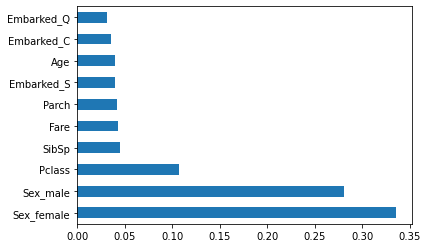

In [19]:
%matplotlib inline 
(pd.Series(best_classsifier.feature_importances_, index=features)
   .nlargest(20)
   .plot(kind='barh'))

### Preparing the submission file

In [20]:
df_test.reset_index(inplace=True)

submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": y_pred
    })

In [21]:
# file to be submitted
submission.to_csv('submission.csv', index=False)